<a href="https://colab.research.google.com/github/bhargavi8601/MINI-PROJECT/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader

In [ ]:
!mkdir images
from bing_image_downloader import downloader
downloader.download("cat",limit=30,output_dir='images',
                    adult_filter_off=True)

In [ ]:
downloader.download("red apple fruit",limit=30,output_dir='images',
                    adult_filter_off=True)

In [ ]:
import numpy as np
a=np.array([[1,2,3,4,5],
            [4,5,6,7,8]])
a.ndim
a.flatten()

In [25]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target=[]
images=[]
flat_data=[]
Datadir='/content/images'
Categories=['cat','red apple fruit']
for i in Categories:
  class_num=Categories.index(i)
  path=os.path.join(Datadir,i)
  for img in os.listdir(path):
   img_array= imread(os.path.join(path,img))
   img_resized=resize(img_array,(150,150,3))
   flat_data.append(img_resized.flatten())
   images.append(img_resized)
   target.append(class_num)

flat_data=np.array(flat_data)
target=np.array(target)
photos=np.array(photos)

In [ ]:
len(flat_data[0])

In [ ]:
target

In [ ]:
unique,count=np.unique(target,return_counts=True)
plt.bar(Categories,count)

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                  test_size=0.3,random_state=109)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['poly']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

In [ ]:
y_pred = clf.predict(x_test)
y_pred

In [ ]:
y_test

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [35]:
accuracy_score(y_pred,y_test)

0.9047619047619048

In [ ]:
confusion_matrix(y_pred,y_test)

In [37]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [39]:
model=pickle.load(open('img_model.p','rb'))

Enter your URLhttps://th.bing.com/th/id/OIP.YTSowgbmh4zXHqvy3_mbnQHaHa?w=178&h=180&c=7&o=5&pid=1.7
(180, 178, 3)
PREDICTED OUTPUT: red apple fruit


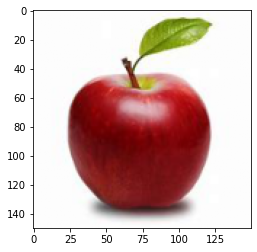

In [41]:
flat_data = []
url=input('Enter your URL')
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=Categories[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')